In [5]:
%cd /home/hyuksu/projects/ml/bootcampdeeplearning

/home/hyuksu/projects/ml/bootcampdeeplearning


### RNN에 대한 기본 개념을 이해해보자

- RNN(Recurrent Neural Network,순환신경망)
- RNN은 이전 데이터가 다음 데이터에 영향을 미치는 경우 활용
- 과거를 기억하면서, 데이터를 처리
- KERAS 의 SimpleRNN을 사용해보자

| 구분 | CNN | RNN |
|------|-----|-----|
| 주 용도 | 이미지, 영상 | 텍스트, 시계열 |
| 핵심 특징 | 공간적 특징 추출 | 시간/순서 정보 기억 |
| 중요한 정보 | 위치, 패턴 | 앞뒤 관계 |
| 병렬 처리 | 가능 | 어려움 |
| 대표 예시 | 얼굴 인식, 종양 분류 | 문장 분류, 번역 |

### char 단위로 학습하기
- 4개의 글자가 들어가면 다음 글자를 맞추는 모델을 만들어보자
- hello,apple,happy,drink,house
- 단어사전:h,e,l,o,a,p,y,d,r,i,n,k,u,s

In [6]:
import numpy as np



In [7]:
# 데이터는 5개의 샘플
# 각 샘플은 4개의 글자로 이루어져 있고, 단어사전에 따라 원핫 인코딩 된 데이터 사용
# 예를들어, 'hello'

In [8]:
#1
chars=['h','e','l','o','a','p','y','d','r','i','n','k','u','s']
#2. 학습에 사용될 4문자
words=['hell','appl','happ','hous']

char2idx={c:i for i ,c in enumerate(chars)}

# 3. x배열 초기화
# 샘플수 시쿼스 길이 문자 종류수

x=np.zeros((len(words),4,len(chars)),dtype=int)

#4. 문자 단위 원핫 인코딩
for i, word in enumerate(words):
    #첫번쨰 실행시 i=0, word='hell'
    for j,char in enumerate(word):
        #첫번째 싱행시 j=0 char='h'
        x[i,j,char2idx[char]]=1

In [9]:
x

array([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])

In [10]:
X = np.array([
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]], # h, e, l, l
    [[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]], # a, p, p, l
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0]], # h, a, p, p
    [[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,0]], # d, r, i, n
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1]] # h, o, u, s
])
X

array([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    

In [11]:
# y데이터는 각 샘플에 대한 목표값(출력)
# 예를들어 'hell' 다므에 나오는 글자는 'o' 첫번쨰 샘플에 대한 목표값은 'o'
# y의 차원음 (5,14)

y = np.array([[0,0,0,1,0,0,0,0,0,0,0,0,0,0],  # 'hell' -> 'o'
              [0,1,0,0,0,0,0,0,0,0,0,0,0,0],  # 'appl' -> 'e'
              [0,0,0,0,0,0,1,0,0,0,0,0,0,0],  # 'happ' -> 'y'
              [0,0,0,0,0,0,0,0,0,0,0,1,0,0],  # 'drin' -> 'k'
              [0,1,0,0,0,0,0,0,0,0,0,0,0,0]]) # 'hous' -> 'e'
y


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [12]:
# 입력 x의 형태는 (5,4,14)
#5개의 샘플
# 각 샘플은 4개의 즐자로 이루어저있음
# 각 글자는 14차원의 원-핫 벡터로 표현됨
# 출력  y의 형태는 (5,14) 로 각 샘플에 대해 다음 글자를 원핫 벡터로 나타냄


X.shape, y.shape

((5, 4, 14), (5, 14))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,InputLayer
# simplrnn:keras에서 제공하는 기본 rnn 레이어
# 순환 신경망 rnn 을 구성하는 레이어로, 시퀀스 데이터를 처리하며
# 이전 상태를 기억하며 다음 상태에 반영

In [14]:
#1.모델 구조 정의
model=Sequential()

#입력층
model.add(InputLayer(input_shape=(4,14))) # 샘플수 제외(4,14)한 입력 모양 정의
# 즉,(배치크기,시퀀스길이,입력특성의 차원)의 데이터가 들어오길 기대

#중간층
model.add(SimpleRNN(units=16,activation='relu')) #안쓰면 tanh함수 기본임

#출력층
model.add(Dense(14,activation='softmax'))
model.summary()

# simple_rnn_Paran: 496개의 학습 가능한 파라미터
# -> [입력노두수 14* 출력노드수16]+ [출력노드수(16)*출력노드수(16)] + 출력노드에 대한 편향값(16)=496

# dense Param= 238개의 학습 가능한 파라미터
# -> 입력차원 (16)* 출력지원(14)+ 출력노드에대한 편향값(14) =238

/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2026-01-16 09:13:11.945792: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │           238 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734 (2.87 KB)

 Trainable params: 734 (2.87 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 학습방법 설정
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X,y,epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.6549   
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 2.6436
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2000 - loss: 2.6323
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2000 - loss: 2.6210
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2000 - loss: 2.6100
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2000 - loss: 2.5991
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2000 - loss: 2.5882
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2000 - loss: 2.5773
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2000 - loss: 2.5670
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2000 - loss: 2.5565
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2000 - loss: 2.5459
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - 

In [17]:
#예측시키기
#모델의 입력형태(샘플 개수,4개의 길가,단어사전 개수)로 test set 하나 만들기

test=X[0].reshape(1,4,14)
test.shape

(1, 4, 14)

In [18]:
model.predict(test).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


W0000 00:00:1768522429.520413    1191 graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_1/simple_rnn_1/while/body/_1/sequential_1/simple_rnn_1/while/simple_rnn_cell_1/Relu}}
	.  Registered:  <no registered kernels>

2026-01-16 09:13:49.527571: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:135] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential_1/simple_rnn_1/while/body/_1/sequential_1/simple_rnn_1/while/simple_rnn_cell_1/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
E0000 00:00:1768522429.531320    1191 meta_optimizer.cc:967] remapper failed: NOT_FOUND: Op type not registered '' in binary running on BOOK-IOJVF0CD47. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib (e.g. `tf.co

np.int64(3)

### RNN활용하기:네이버영화 리뷰데이터 감성분석
- 긍정,부정 이진분류 데이터셋

## 시나리오
### 배경
- '무비톡'은 월간 활성 사용자 200만명을 보유한 국내 영화 리뷰 플랫폼
- 매일 5.000건 이상의 리뷰가 등록되어 수작업,모니터링에 한계
- 실시간 감성 파악을 통해 추천 알고리즘,고객대응,마케팅 전략에 즉시 반영해야 하는 과제 존재

## 주요 이해 관계자
- 제품 기획팀: 감성 분석 결과를 개인화 추천 시스템에 통합해 이용자 만족도 향상
- 고객 지원팀: 부정 리뷰 중 악성,허위 게시물 자동 태깅 후 신속 대응 프로세스 설립
- 마케팅팀: 긍정 리뷰룰 카드 뉴스.배너 광고 등 홍보 소재로 활용하여 전환률 재고

WORD 단위로 학습하기
- 데이터 로딩
- 결측치 제거
- 문제와 답 분리

In [19]:
!pwd

/home/hyuksu/projects/ml/bootcampdeeplearning


In [20]:
#데이터 로딩
import pandas as pd
train_df=pd.read_csv('/home/hyuksu/projects/ml/bootcampdeeplearning/data/ratings_train.csv',encoding='utf-8')
test_df=pd.read_csv('/home/hyuksu/projects/ml/bootcampdeeplearning/data/ratings_test (1).csv',encoding='utf-8')

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [23]:
test_df=test_df.dropna()
train_df=train_df.dropna()

In [24]:
train_df.head(20)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


### 학습을 위한 전처리

- 특수문자 제거
- 불용어 제거
- 형태소 분리 (어간 추출+정규화)
- 인코딩(라벨링인코딩 방식 활용)+ 길이(순환횟수)를 맞추는 작업

In [25]:
import re

In [26]:
# 특수문자 제거용 정규표현식

pattern=re.compile(r'[^a-zA-Z0-9가-힣\s\.\?\!]')

# r :Raw String(원시 문자열), 정규표현식 패턴 잡을 때 주로 활용
# 파이선에서 \는 툭슈 의미가 있음
# 일반 문자열에서는 '\n'이 개행을 의미해서,문자 그대로 '\n'를 표현하려면 '\\n'
# r을 사용하면 백슬래시를 이스케이프할 필요 없이 \n을 그대로 사용 가능합니다.
# r'\n': 문자 그대로 \ㅜ
# []: 문자 하나를 의미
#[a-z]: 알파벳 a부터 z까지 중 하나
#[a-zA-Z0-9]: 영어 소문자,대문자,숫자 중 하나
#[가-힣]: 모든 한글 음절
# \S: 공백
# ^: NOT
# r'[^a-zA-Z0-9가-힣\s\.\?\!]':영문자 숫자 한글 공백 .? ! 가아닌 문자

In [27]:
d='오늘 영화 REVIEW 평점은 10점 만점에 9.5점! 너무 재밌었어요 ~~! #감동'

In [28]:
# re pattern 테스트

a=re.sub(pattern,'',d)
#영문자 , 숫자 한글 공백 =?! 가 아닌 문자들은 전부 제거

In [29]:
a

'오늘 영화 REVIEW 평점은 10점 만점에 9.5점! 너무 재밌었어요 ! 감동'

| 형태소 분석기                  | 속도        | 정확도        | 특징                                                         | 장단점                                                         | 주요 메서드 및 인자                                                                                   | 인자 설명                                                                                                                             |
|-------------------------------|-------------|---------------|--------------------------------------------------------------|----------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| **Mecab**                     | 매우 빠름   | 높음          | - 백터 기반의 빠른 분석<br>- 대용량 데이터 처리에 적합          | + **장점:** 속도 및 효율성 우수<br>- **단점:** 설치 복잡·사전 관리 필요 | - `pos(phrase, flatten=True)`<br>- `nouns(phrase)`<br>- `morphs(phrase)`                               | - **flatten**: 결과를 평탄화하여 하나의 리스트로 반환<br>- **nouns/morphs**: 명사 또는 전체 형태소만 추출                                 |
| **Kkma**                      | 느림        | 높음          | - 문장 단위 세밀 분석<br>- 다양한 형태소 정보 리턴            | + **장점:** 상세 분석·문맥 파악 용이<br>- **단점:** 속도 느림·대용량 부적합 | - `pos(phrase, flatten=True)`<br>- `sentences(phrase)`<br>- `nouns(phrase)`<br>- `morphs(phrase)`     | - **flatten**: 리스트 평탄화 여부<br>- **sentences**: 입력 텍스트를 문장 단위로 분리<br>- **nouns/morphs**: 명사 또는 전체 형태소 추출    |
| **Hannanum**                  | 보통        | 중간          | - KAIST 개발 전통적 분석기<br>- 기본 문법 규칙 기반            | + **장점:** 안정적 결과 제공<br>- **단점:** 문맥 반영 미흡·업데이트 한계   | - `pos(phrase, ntags=9, flatten=True)`<br>- `analyze(phrase)`                                       | - **ntags**: 태그 상세도 지정(일반적으로 9 또는 22)<br>- **flatten**: 결과 평탄화 여부<br>- **analyze**: 여러 후보 분석 결과 반환       |
| **Komoran**                   | 보통        | 높음          | - 최신 알고리즘 일부 적용<br>- 딥러닝 요소 도입 가능          | + **장점:** 높은 정확도·견고한 성능<br>- **단점:** 옵션·커스터마이징 제한 | - `pos(phrase, flatten=True)`<br>- `nouns(phrase)`<br>- `morphs(phrase)`                               | - **flatten**: 결과 평탄화 여부<br>- **nouns/morphs**: 명사 또는 전체 형태소만 추출                                                 |
| **Okt (Open Korean Text)**    | 빠름        | 중간 ~ 높음   | - 소셜 미디어 문체 최적화<br>- 감성 분석 특화                | + **장점:** 사용법 간편·빠른 처리<br>- **단점:** 복잡 문장 분석 한계·단어 세분화 미흡 | - `pos(phrase, norm=False, stem=False)`<br>- `phrases(phrase)`<br>- `nouns(phrase)`<br>- `morphs(phrase)` | - **norm**: 정규화 여부(비표준 표현 표준화)<br>- **stem**: 어간 추출 여부<br>- **phrases**: 문장 내 구(phrase) 추출<br>- **nouns/morphs**: 명사 또는 전체 형태소만 추출 

In [30]:
!pip -q install konlpy kiwipiepy


In [48]:
from kiwipiepy.utils import Stopwords
# 한국어 불용어 리스트 제공

In [49]:
from kiwipiepy.utils import Stopwords
# 한국어 불용어 리스트 제공

# 불용어 객체 초기화
stopwords = Stopwords()

# 등록되어있는 불용어 조회
print(stopwords.stopwords)

stopwords_list = [word for word, tag in stopwords.stopwords]
stopwords_list # 품사 제외

{('면서', 'EC'), ('와', 'JC'), ('라는', 'ETM'), ('명', 'NNB'), ('만', 'NR'), ('겠', 'EP'), ('과', 'JKB'), ('가', 'JKS'), ('던', 'ETM'), ('대하', 'VV'), ('다', 'EF'), ('수', 'NNB'), ('화', 'XSN'), ('더', 'MAG'), ('지만', 'EC'), ('아니', 'VCN'), ('과', 'JC'), ('면', 'EC'), ('하', 'VX'), ('성', 'XSN'), ('원', 'NNB'), ('일', 'NNG'), ('받', 'VV'), ('보', 'VV'), ('때', 'NNG'), ('사람', 'NNG'), ('는', 'ETM'), ('고', 'JKQ'), ('이', 'JKC'), ('따르', 'VV'), ('도', 'JX'), ('어서', 'EC'), ('은', 'JX'), ('지', 'VX'), ('었', 'EP'), ('ᆫ', 'ETM'), ('며', 'EC'), ('이', 'JKS'), ('있', 'VX'), ('까지', 'JX'), ('중', 'NNB'), ('의', 'JKG'), ('어', 'EF'), ('다고', 'EC'), ('을', 'ETM'), ('에서', 'JKB'), ('기', 'ETN'), ('것', 'NNB'), ('한', 'MM'), ('다는', 'ETM'), ('에', 'JKB'), ('게', 'EC'), ('이', 'MM'), ('위하', 'VV'), ('라', 'EC'), ('부터', 'JX'), ('만', 'JX'), ('우리', 'NP'), ('지', 'EC'), ('일', 'NNB'), ('다', 'EC'), ('월', 'NNB'), ('제', 'XPN'), ('하', 'VV'), ('어', 'EC'), ('같', 'VA'), ('에게', 'JKB'), ('은', 'ETM'), ('들', 'XSN'), ('ᆯ', 'ETM'), ('하', 'XSV'), ('통하', 'VV'), ('되', 'VV')

['면서',
 '와',
 '라는',
 '명',
 '만',
 '겠',
 '과',
 '가',
 '던',
 '대하',
 '다',
 '수',
 '화',
 '더',
 '지만',
 '아니',
 '과',
 '면',
 '하',
 '성',
 '원',
 '일',
 '받',
 '보',
 '때',
 '사람',
 '는',
 '고',
 '이',
 '따르',
 '도',
 '어서',
 '은',
 '지',
 '었',
 'ᆫ',
 '며',
 '이',
 '있',
 '까지',
 '중',
 '의',
 '어',
 '다고',
 '을',
 '에서',
 '기',
 '것',
 '한',
 '다는',
 '에',
 '게',
 '이',
 '위하',
 '라',
 '부터',
 '만',
 '우리',
 '지',
 '일',
 '다',
 '월',
 '제',
 '하',
 '어',
 '같',
 '에게',
 '은',
 '들',
 'ᆯ',
 '하',
 '통하',
 '되',
 '그',
 '적',
 '로',
 '이',
 '하',
 '주',
 '않',
 '되',
 '말',
 '는',
 '으로',
 '지역',
 '있',
 '어야',
 '을',
 '나',
 'ᆫ다',
 '년',
 '등',
 '와',
 '고',
 'ᆫ',
 '를',
 '그',
 '없',
 '때문',
 '이']

In [50]:
from konlpy.tag import Okt
okt=Okt()

In [34]:
temp=okt.pos('배고파 두쫀쿠 ㅜ',stem=True,# 어간추출(먹었다,먹었음,먹었어요->'먹다')
             norm=True #정규화 (입력 문장을 표준화 된 형태소로 변환 비표준표현 삭제)
             )
temp
# Modifier: 관형어
# Korean Particle: ex_ 'ㅋㅋ'

[('배고프다', 'Adjective'), ('두쫀쿠', 'Noun'), ('ㅜ', 'KoreanParticle')]

In [51]:
okt.tagset
# noun(명사), Adjective(형용사),verb(동사)
# 학습(또는 분석) 결과에 따라 다른 품사 선택 가능

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [52]:
# 전처리 함수 정의
def preprocess_text(text):
    # 1) 특수문자 제거, 소문자화, 양끝 공백 제거
    text = re.sub(pattern, '', text).lower().strip()
    
    # 2) 형태소 분석(어간 추출 + 정규화)
    pos_tag = okt.pos(text, stem=True, norm=True)

    # 3) 명사, 형용사, 동사만 남기고, kiwipiepy Stopwords로 불용어 필터링
    tokens = [
        word
        for word, tag in pos_tag # word: 문자, tag: 품사
        if tag in ['Noun', 'Adjective', 'Verb'] # 만약에 품사가 명사 or 형용사 or 동사라면 리스트에 담아준다
        and word not in stopwords_list # 그리고 불용어도 아니라면 word는 tokens으로 넣어줄거다
    ]

    return ' '.join(tokens) # 공백으러 이어서 문자열로 반환 해준다
    

In [37]:
from tqdm.auto import tqdm

In [38]:
# tqdm의 pandas 확장 기능 활성화
# -> pandas 의 apply 계열 함수에 진행률을 보여줄 수 있게 해줌

tqdm.pandas()

In [39]:
# w
x_train_clean=train_df['document'].progress_apply(preprocess_text)
x_test_clean=test_df['document'].progress_apply(preprocess_text)

  0%|          | 0/149995 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
x_train_clean,train_df

(0                                            더빙 진짜 짜증나다 목소리
 1                             흠 포스터 보고 초딩 영화 줄 오버 연기 가볍다 않다
 2                                         무재 밓었 다그 래서 보다 추천
 3                               교도소 이야기 구먼 솔직하다 재미 없다 평점 조정
 4         몬페 익살스럽다 연기 돋보이다 영화 스파이더맨 늙다 보이다 하다 커스틴 던스트 이쁘...
                                 ...                        
 149995                                           인간 문제 소 죄인
 149996                                                평점 낮다
 149997                             뭐 한국인 거들다 먹거리 필리핀 혼혈 착하다
 149998                              청춘 영화 최고봉 방황 우울하다 날 자화상
 149999                             한국 영화 최초 수간 하다 내용 담기다 영화
 Name: document, Length: 149995, dtype: object,
               id                                           document  label
 0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
 1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
 2       10265843                                  너무

In [ ]:
x_train_clean.shape,x_test_clean.shape

((149995,), (49997,))

In [ ]:
# 답 분리

y_train=train_df['label']
y_test=test_df['label']

In [ ]:
import pickle



In [ ]:
#저장

with open('./data/x_train_morphs.pkl','wb')as f:
    pickle.dump(x_train_clean,f) #파이썬 객체를 파일형태로 직렬화해서 저장
    
with open('./data/x_test_morphs.pkl','wb')as f:
    pickle.dump(x_test_clean,f) #파이썬 객체를 파일형태로 직렬화해서 저장

with open('./data/y_train_morphs.pkl','wb')as f:
    pickle.dump(y_train,f) #파이썬 객체를 파일형태로 직렬화해서 저장

with open('./data/y_test_morphs.pkl','wb')as f:
    pickle.dump(y_test,f) #파이썬 객체를 파일형태로 직렬화해서 저

In [ ]:
# 로딩
with open('/home/hyuksu/projects/ml/bootcampdeeplearning/data/x_train_morphs.pkl','rb') as f:
    a=pickle.load(f)
    
    
    
a

0                                            더빙 진짜 짜증나다 목소리
1                             흠 포스터 보고 초딩 영화 줄 오버 연기 가볍다 않다
2                                         무재 밓었 다그 래서 보다 추천
3                               교도소 이야기 구먼 솔직하다 재미 없다 평점 조정
4         몬페 익살스럽다 연기 돋보이다 영화 스파이더맨 늙다 보이다 하다 커스틴 던스트 이쁘...
                                ...                        
149995                                           인간 문제 소 죄인
149996                                                평점 낮다
149997                             뭐 한국인 거들다 먹거리 필리핀 혼혈 착하다
149998                              청춘 영화 최고봉 방황 우울하다 날 자화상
149999                             한국 영화 최초 수간 하다 내용 담기다 영화
Name: document, Length: 149995, dtype: object

In [ ]:
x_train_clean.shape

(149995,)

### 토큰화: 문장을 특정 기준에 맞춰서 자르는 행위
- 글자단위, 단어단위(띄어쓰기),형태소단위(명사,형용사,동사 등)

### 수치화: 잘라진 토큰을 일정 기준(알고리즘)에 맞춰 숫자로 변경하는 행위
- 원핫인코딩,라벨인코딩,bow,tf-idf,워드 임베딩

In [44]:
from tensorflow.keras.layers import TextVectorization
# 텍스트 데이터를 학습용 수치데이터(벡터)로 변경(토큰화,수치화 등) 하는 클래스

In [53]:
# 토큰화 진행
vectorizer=TextVectorization(max_tokens=5000, #사전에서 사용할 최대 단어 수를설정, 5000개의 단어를 사용하여 단어 사전을 만들고,그 안에서 단어들을 인덱스로 변환함
                             output_mode='int', #토큰을 정수 인덱스로 변환함   # 5000개 안에서 단어들을 인덱스로 변환함
                             #출력되는 정수 시퀀스의 길이를 고정(텍스트가 짧으면 패딩(0)을추가,길면 자름
                            output_sequence_length=10,
                            standardize='lower_and_strip_punctuation'
                            #standardize: 텍스트 데이터를 표준화하는 방식 지정(텍스트가 일관된 형식으로 정리)
                            #lower_and_strip_punctuation: 텍스트에서 모든 문자를 소문자로 변환, 구두점 제거
                            )               
# 기본 토큰화 기준 뛰어쓰기

In [46]:
# x_train_clean에 벡터라이저 적용

vectorizer.adapt(x_test_clean) #훈련데이터 기반으로 전처리, 토큰화,단어사전 구축 실시
# 단어가 사전에 등록된 순서에 따라 매핑됨(각 단어에 대해 고유한 정수 인덱스가 할당)
#예를들어 hello world this is a test -> [1,2,3,4,5,6]

NameError: name 'x_test_clean' is not defined

In [ ]:
vectorizer.vocabulary_size()

5000

In [ ]:
print(vectorizer.get_vocabulary())
# unk: 단어사전에 등록되지 않는 단어에 대해 표현할 수 없는 토큰(알수없는초큰)

['', '[UNK]', np.str_('영화'), np.str_('하다'), np.str_('보다'), np.str_('없다'), np.str_('있다'), np.str_('좋다'), np.str_('재밌다'), np.str_('정말'), np.str_('되다'), np.str_('진짜'), np.str_('같다'), np.str_('이다'), np.str_('아니다'), np.str_('점'), np.str_('않다'), np.str_('만들다'), np.str_('평점'), np.str_('연기'), np.str_('나오다'), np.str_('최고'), np.str_('생각'), np.str_('왜'), np.str_('스토리'), np.str_('드라마'), np.str_('감동'), np.str_('보고'), np.str_('이렇다'), np.str_('아깝다'), np.str_('내'), np.str_('감독'), np.str_('배우'), np.str_('내용'), np.str_('거'), np.str_('재미있다'), np.str_('재미'), np.str_('그냥'), np.str_('주다'), np.str_('뭐'), np.str_('자다'), np.str_('재미없다'), np.str_('좀'), np.str_('가다'), np.str_('지루하다'), np.str_('시간'), np.str_('쓰레기'), np.str_('들다'), np.str_('사랑'), np.str_('볼'), np.str_('모르다'), np.str_('그렇다'), np.str_('싶다'), np.str_('작품'), np.str_('알다'), np.str_('다시'), np.str_('하나'), np.str_('마지막'), np.str_('오다'), np.str_('처음'), np.str_('많다'), np.str_('정도'), np.str_('완전'), np.str_('장면'), np.str_('주인공'), np.str_('나다'), np.str_('액션'),

In [ ]:
# 학습데이터를 벡터화 하여 정수 시퀀스(학습 가능한 데이터)로 변환
x_train_vec=vectorizer(x_train_clean)
x_test_vec=vectorizer(x_test_clean)

In [ ]:
x_train_vec,x_train_clean

(<tf.Tensor: shape=(149995, 10), dtype=int64, numpy=
 array([[ 324,   11,  151, ...,    0,    0,    0],
        [ 876,  355,   27, ...,   19,  542,   16],
        [   1,    1, 4876, ...,    0,    0,    0],
        ...,
        [  39, 1193, 4196, ...,    0,    0,    0],
        [ 897,    2, 2472, ...,    0,    0,    0],
        [ 132,    2, 1586, ...,    2,    0,    0]], shape=(149995, 10))>,
 0                                            더빙 진짜 짜증나다 목소리
 1                             흠 포스터 보고 초딩 영화 줄 오버 연기 가볍다 않다
 2                                         무재 밓었 다그 래서 보다 추천
 3                               교도소 이야기 구먼 솔직하다 재미 없다 평점 조정
 4         몬페 익살스럽다 연기 돋보이다 영화 스파이더맨 늙다 보이다 하다 커스틴 던스트 이쁘...
                                 ...                        
 149995                                           인간 문제 소 죄인
 149996                                                평점 낮다
 149997                             뭐 한국인 거들다 먹거리 필리핀 혼혈 착하다
 149998                              청춘 영화 최고봉 방황 우울하다 날

In [ ]:
x_train_vec.shape # 출력형태는 (샘플수,시퀀스 길이)
# 149995,10 -> 149995개의 샘플, 각 샘플은 10개의 정수로 구성된 시퀀스

TensorShape([149995, 10])

In [ ]:
train_df.head(1),x_train_clean.head(1),x_train_vec[0]
# shape(10)
#numpy=array([324,11,151,458,0,0,0,0,0,0])
#-> 단어 사전에 매핑 된 정수(인덱스)깂, 길이가 부족한 경우 0으로 패딩됨



(        id             document  label
 0  9976970  아 더빙.. 진짜 짜증나네요 목소리      0,
 0    더빙 진짜 짜증나다 목소리
 Name: document, dtype: object,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([324,  11, 151, 458,   0,   0,   0,   0,   0,   0])>)

In [ ]:
# RNN은 입력을 반드시(배치크기, 시퀀스 길이, 특성 차원수)
#입력데이터의 모양을 (149995,10,1)로 변환해서 학습

x_train_vec=np.expand_dims(x_train_vec,axis=-1)
# -1: 마지막층을 확장
x_test_vec=np.expand_dims(x_test_vec,axis=-1)

In [ ]:
#외종 모양 확인
x_train_vec.shape,x_test_vec.shape

# x_trian set
# - 약 15만개의 샘플
# - 각 샘플은 10개의 시퀀스 길이로 이루어저있음
# - 벡터의 특성 차원 수는 1개

((149995, 10, 1), (49997, 10, 1))

### 학습
1. 모델 구조 정의
2. 학습 방법 설정
3. 학습
4. 예측

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, InputLayer

#simpleRNN:keras에서 제공하는 기본 RNN레이어
# 순환 신경망(RNN)을 구성한느 레이어로, 시퀀스 데이터를 처리하며, 이전상태를 기억하며,다음 학습에 반영



In [65]:

from tensorflow.keras.callbacks import EarlyStopping

early=EarlyStopping(monitor='val_accuracy',patience=7,verbose=1)
# 1, 모델구조 정의
model=Sequential()

# 입력층
model.add(InputLayer(input_shape=(10,1)))# [시퀀스 길이(10),입력특성(1)]

# simpleRNN은 시퀀스 데이터를 처리하는 레이어로, 입력 데이터는 반드시 3차원(shape에서는 2차원)
# 즉(배치 크기, 시퀀스 길이, 입력 특성의 차워수)의 형태가 입력되기를 기대함

#은닉층

model.add(SimpleRNN(units=64,return_sequences=False))
# return_sequence=False: 시퀀스를 더이상 반환하지않는다
# 각각의 순환에서 결과값을 뽑을것인지

#출력층
# 이진분류를 위한 출력 레이어: 1개의 출력 노드 (긍정/부정)
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

#학습방법정의

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 모델 학습

h=model.fit(x_train_vec,y_train,epochs=30,batch_size=64,validation_split=0.2,callbacks=[early])
# 배치 크기가 크면 학습 속도가 빨라지지만, 메모리 사용량이 커짐
# 배치크기가 작으면 학습속도는 느리지만, 메모리 사용량이 줄어들고 가중치 업로드회수가 많음

/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5272 - loss: 0.6916 - val_accuracy: 0.5331 - val_loss: 0.6881
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5324 - loss: 0.6851 - val_accuracy: 0.5333 - val_loss: 0.6818
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5357 - loss: 0.6814 - val_accuracy: 0.5424 - val_loss: 0.6793
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5403 - loss: 0.6784 - val_accuracy: 0.5337 - val_loss: 0.6769
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5435 - loss: 0.6762 - val_accuracy: 0.5431 - val_loss: 0.6753
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5512 - loss: 0.6738 - val_accuracy: 0.5405 - val_loss: 0.6759
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5502 - loss: 0.6722 - val_accuracy: 0.5502 - val_loss: 0.6749
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5541 - loss: 0.6711 - 

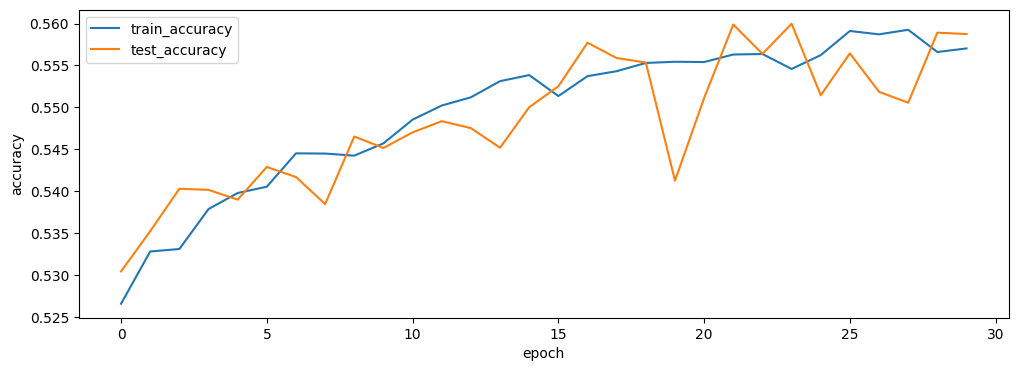

In [ ]:
# 학습결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
# simple rnn의 성능이 그닥 좋지는 않음
# units 개수를 늘리거나, 데이터 변경을 해보거나, 모델을 바꿔보거나
# 또는 학습울 낮춰 보가,-> simplerunn의 성능이 좋지 않음

In [ ]:
pred=model.predict(x_test_vec)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step


In [ ]:
pred

array([[0.4828728 ],
       [0.4657151 ],
       [0.49478015],
       ...,
       [0.40045506],
       [0.4635241 ],
       [0.7221298 ]], shape=(49997, 1), dtype=float32)

In [ ]:
predict1=np.where(pred>0.5,1,0)

In [ ]:
predict=(pred>0.5).astype(int)

In [ ]:
predict1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], shape=(49997, 1))

#### SimpleRNN(바닐라RNN)의 경우 긴 시퀀스를 가진 데이터를 효과적으로 학습하기 어려움
- 순환횟수(시퀀스)가 길어질수록 초반에 입력된 단어의 기억데이터가 소실되는 기울기 소실현상이 발생함
- 문장 구성시 초반 단어가 후반 예측에 영향을 주는 경우는 바닐라RNN이 학습하기 어려움

In [47]:
with open('/home/hyuksu/projects/ml/bootcampdeeplearning/data/x_train_morphs.pkl','rb') as f:
    x_train_clean=pickle.load(f)
    
with open('/home/hyuksu/projects/ml/bootcampdeeplearning/data/x_test_morphs.pkl','rb') as f:
    x_test_clean=pickle.load(f)
with open('/home/hyuksu/projects/ml/bootcampdeeplearning/data/y_test_morphs.pkl','rb') as f:
    y_test=pickle.load(f)
with open('/home/hyuksu/projects/ml/bootcampdeeplearning/data/y_train_morphs.pkl','rb') as f:
    y_train=pickle.load(f)

In [54]:
vectorizer.adapt(x_test_clean)

In [55]:
x_train_vec=vectorizer(x_train_clean)
x_test_vec=vectorizer(x_test_clean)

In [58]:

x_train_vec=np.expand_dims(x_train_vec,axis=-1)

x_test_vec=np.expand_dims(x_test_vec,axis=-1)

In [59]:
x_test_vec.shape,x_test_vec.shape

((49997, 10, 1), (49997, 10, 1))

In [ ]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,InputLayer
import pickle
from tqdm.auto import tqdm
from tensorflow.keras.layers import TextVectorization



In [ ]:
tqdm.pandas()

In [ ]:
#위에서 설치완
#!pip -q install --upgrade gensim
# gensim:텍스트마이닝에서 유용한 패캐지

In [ ]:
# RNN은 과거 정보를 계속 전달
# 기억할건 기억 -> 버릴건 버림 ->LSTM

### LSTM(LONG SHORT -TERM MEMORY)

- 장기기억과 단기기억을 관리하는 계산이 추가된 LSTM이 등장
- 기존 RNN구조에서 메모리 셀 이라는 개념 추가 ->
장기기억을 저장하는 공간
- LSTM의 연산 복잡성을 줄인 GRU 레이어 존재

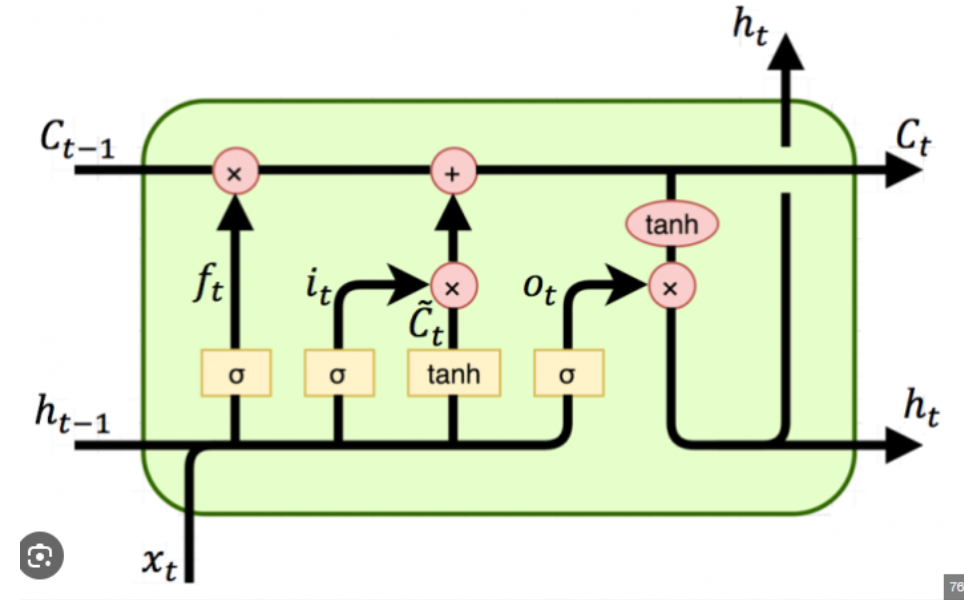

In [ ]:
# C: 장기기억
# H= 단기기억
# t-1: 이전 출력값
# Xt=입력값

# 첫번째 시그마(게이트)
# ft: 새 기억중 얼마나 살릴가

# 두번쨰 시그마

# it: 새 기억 중 얼마나 반영

# tanh +Ct: 현재 입력으로 만든 새로운 기억
# +: 기억추가

# 세번쨰 시그마
# Ot: 얼마나 말할까(다음층으로 전달할가)


In [60]:
from tensorflow.keras.layers import LSTM,GRU

#LSTM
# - 장기 의존성을 처리할 수 있는 순환 신경망 계열의 한종류
# - 기울기 소실 문제를 해결하기 위해 셀 상태와 여러 게이트를 사용하여 정보를 선탠적으로 기억하거나 잊음
# -긴 시퀀스 데이터를 처리할 떄 유리, 텍스트 생성, 번역, 시계열 데이터 예측 등에서 활용 가능

# GRU: Gated Recurent Unit 레이어
# - LSTM보다 간단한 구조의 순환 신경망
# - LSTM의 모든 기능을 포함하면서, 좀 더 가볍고 빠름
# - 셀 상태 대신 은닉 상태만 사용하고, 두개의 게이트를 사용
# - 간단한 구조 덕분에 학습 속도가 LSTM에 비해서 빠르고,성능도 LSTM과 비슷한 경우가 많다

# LSTM여러개 게이트, 장기기억C, 단기기억 H 따로 저정,느림
# GRU 두개 게이트, 장기기억과 단기억을 H에 같이 저장, 빠름

In [61]:
#모델설계

LSTM_MODEL=Sequential()
LSTM_MODEL.add(InputLayer(shape=(10,1)))
LSTM_MODEL.add(LSTM(units=64))
LSTM_MODEL.add(Dense(units=1,activation='sigmoid'))

#학습방법
LSTM_MODEL.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#모델 학습

h_lstm=LSTM_MODEL.fit(x_train_vec,y_train,validation_split=0.2,epochs=30,batch_size=128)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5533 - loss: 0.6817 - val_accuracy: 0.5581 - val_loss: 0.6784
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5642 - loss: 0.6771 - val_accuracy: 0.5533 - val_loss: 0.6776
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5691 - loss: 0.6742 - val_accuracy: 0.5657 - val_loss: 0.6737
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5719 - loss: 0.6711 - val_accuracy: 0.5640 - val_loss: 0.6782
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5751 - loss: 0.6688 - val_accuracy: 0.5740 - val_loss: 0.6680
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5762 - loss: 0.6663 - val_accuracy: 0.5694 - val_loss: 0.6683
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5792 - loss: 0.6644 - val_accuracy: 0.5780 - val_loss: 0.6715
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5830 - loss: 0.6626 - val_accuracy: 0.

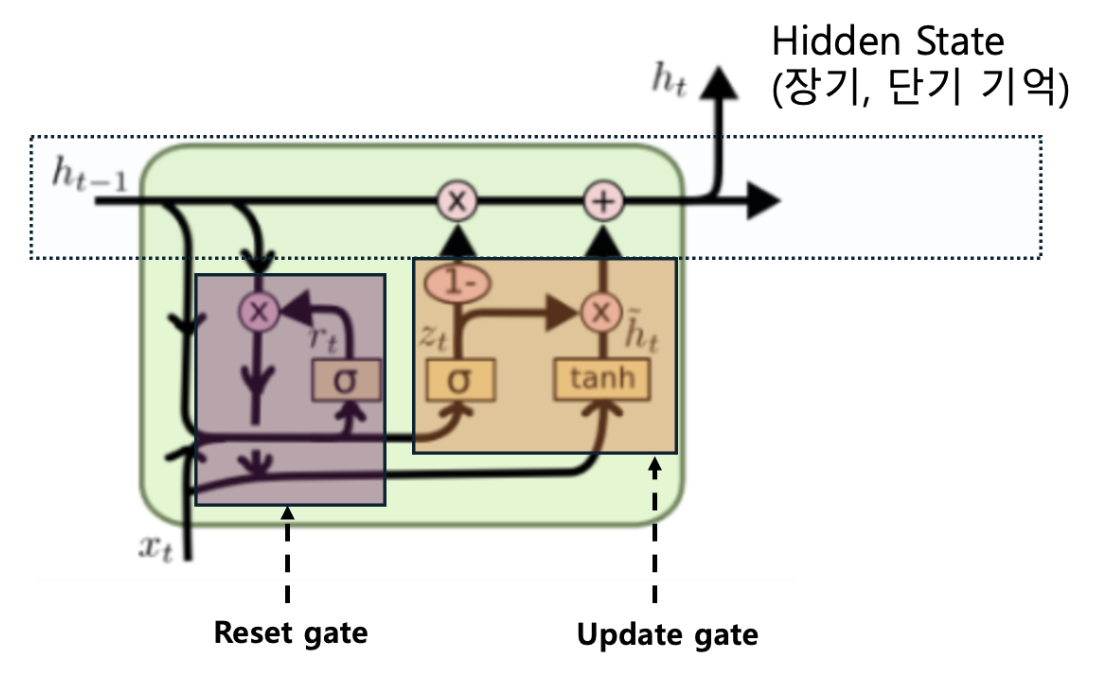
### GRU (Gated Recurrent Unit)

* LSTM의 복잡성을 줄인 순환 신경망(RNN) 변형
* **Reset Gate**와 **Update Gate** 두 가지만 사용
* 셀 상태(cell state) 없이 은닉 상태(hidden state) 하나만 관리

---

## 주요 구성 요소

| 구성 요소                                       | 역할                                           | 수식                                                                 |
| ------------------------------------------- | -------------------------------------------- | ------------------------------------------------------------------ |
| **Reset Gate**<br/>($r_t$)                  | 이전 은닉 상태 $(h_{t-1})$을 얼마나 “초기화”할지 결정         | $r_t = \sigma(W_r x_t + U_r h_{t-1})$                              |
| **Update Gate**<br/>($z_t$)                 | 이전 은닉 상태 유지 vs. 새로운 후보 상태 반영 비율 결정           | $z_t = \sigma(W_z x_t + U_z h_{t-1})$                              |
| **Candidate Activation**<br/>($\tilde h_t$) | reset gate에 의해 조절된 상태 + 현 입력으로 새로운 정보 생성     | $\tilde h_t = \tanh\bigl(W_h x_t + U_h\,(r_t \odot h_{t-1})\bigr)$ |
| **Hidden State**<br/>($h_t$)                | update gate로 이전 상태와 후보 상태를 가중합하여 최종 은닉 상태 생성 | $h_t = (1 - z_t)\odot h_{t-1} \;+\; z_t\odot \tilde h_t$           |

* $\sigma$: 시그모이드 함수
* $\odot$: 원소별 곱(element-wise multiplication)

---

## 동작 순서

1. **Reset Gate 계산**

   * $h_{t-1}$의 정보를 얼마나 잊을지 결정
2. **Candidate Activation 계산**

   * $r_t$로 조절된 $h_{t-1}$과 $x_t$를 합쳐 새로운 후보 $\tilde h_t$ 생성
3. **Update Gate 계산**

   * 이전 상태 유지 비율과 새로운 상태 반영 비율 결정
4. **최종 Hidden State 계산**

   * $(1 - z_t)$ 만큼 옛 상태를, $z_t$ 만큼 신규 후보를 섞어 $h_t$ 생성

---

## 특징
  * 파라미터 수가 LSTM보다 적어 학습이 빠르고 메모리 효율적
  * 간단한 구조로도 장기 의존성(long-term dependency) 관리 가능
  * LSTM보다 표현력이 다소 떨어질 수 있음
  * 특정 문제에서는 LSTM이 더 안정적일 때도 있음

## GRU모델링

In [64]:
# 모델 설계

GRU_model=Sequential()

GRU_model.add(InputLayer(shape=(10,1)))

GRU_model.add(LSTM(units=64))
GRU_model.add(Dense(units=1,activation='sigmoid'))

#학습방법
GRU_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#모델 학습

h_gru=GRU_model.fit(x_train_vec,y_train,validation_split=0.2,epochs=30,batch_size=128)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5565 - loss: 0.6804 - val_accuracy: 0.5599 - val_loss: 0.6787
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5663 - loss: 0.6753 - val_accuracy: 0.5558 - val_loss: 0.6795
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5701 - loss: 0.6723 - val_accuracy: 0.5720 - val_loss: 0.6710
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5737 - loss: 0.6700 - val_accuracy: 0.5718 - val_loss: 0.6721
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5757 - loss: 0.6674 - val_accuracy: 0.5711 - val_loss: 0.6702
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5763 - loss: 0.6658 - val_accuracy: 0.5737 - val_loss: 0.6677
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5782 - loss: 0.6641 - val_accuracy: 0.5774 - val_loss: 0.6645
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5819 - loss: 0.6626 - val_accuracy: 0.

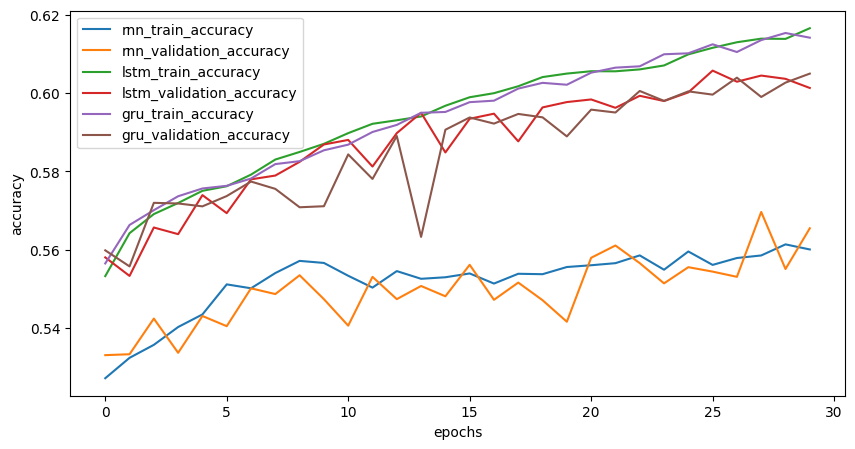

In [67]:
# 결과 시각화

plt.figure(figsize=(10,5))

#바닐라 rnn
plt.plot(h.history['accuracy'],label='rnn_train_accuracy')
plt.plot(h.history['val_accuracy'],label='rnn_validation_accuracy')

# lstm
plt.plot(h_lstm.history['accuracy'],label='lstm_train_accuracy')
plt.plot(h_lstm.history['val_accuracy'],label='lstm_validation_accuracy')

# gru
plt.plot(h_gru.history['accuracy'],label='gru_train_accuracy')
plt.plot(h_gru.history['val_accuracy'],label='gru_validation_accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()

plt.show()

### 워드 임베딩

- 인공지능 기반의 텍스트마이닝, 자연어 처리 모델링을 할때 입력되는 데이터의 수치화 방법도 중요함
- 현재 라벨인코딩 기반의 수치화는 모델이 단어의 빈도패턴을 학습하는것과 비슷함
- 단어의 본질적인 의미를 파악할 수 있도록 수치화를 정교하게 진행해보자

In [ ]:
# 원핫인코딩인 경우
# 왕  :[1,0,0,0]
# 여왕:[0,1,0,0]
# 여자:[0,0,1,0]
# 남자:[0,0,0,1]

# 단어간 관계 없음, 서로 독립적
# 단어를 숫자 벡터로 표시해서 연산이 가능하도록
# 왕- 남자 +여자=여왕


In [69]:
# word2vec모델(사전학습 모델)을 활용

import gensim.downloader as api
# gensim: 복잡한 설치 없이 간단한 api 호출로 학습 된 워드 임베딩 모델 제공

- Records : 레코드의 수, 즉 데이터의 개수를 의미(각 "레코드"는 임베딩된 단어 하나를 의미)

| 모델 이름                           | 레코드 수      | 설명                                                                                                  |
|-------------------------------------|----------------|-------------------------------------------------------------------------------------------------------|
| conceptnet-numberbatch-17-06-300    | 1,917,247      | ConceptNet Numberbatch는 개념 간의 관계를 학습한 모델.                                                 |
|                                     |                | 상식을 이해하고 개념 간 관계를 연결시키기 위해 개발됨.                                                 |
|                                     |                | 주로 의미 네트워크 연구에 사용됨. "고양이"와 "동물" 간의 관계를 학습.                                  |
| fasttext-wiki-news-subwords-300     | 999,999        | fastText는 단어뿐만 아니라 서브워드(단어의 작은 부분)를 학습.                                          |
|                                     |                | "unbelievable"을 "un", "believe", "able"로 나누어 학습.                                                 |
|                                     |                | Wikipedia와 뉴스 기사 데이터를 기반으로 학습됨.                                                       |
| glove-twitter-100                   | 1,193,514      | GloVe는 Stanford에서 개발된 모델로, 단어 간의 공간적 관계를 벡터로 표현.                               |
|                                     |                | 트위터 데이터(2억 개 트윗)로 학습되어 소셜 미디어 자연어 처리 작업에 적합.                             |
| word2vec-google-news-300            | 3,000,000      | Word2Vec은 구글 뉴스 데이터로 학습된 모델.                                                             |
|                                     |                | 뉴스 기사의 단어 간 유사성 및 의미적 관계를 잘 포착.                                                   |
|                                     |                | 뉴스 데이터 기반이기 때문에 자연어 처리에 많이 사용됨.                                                 |
| word2vec-ruscorpora-300             | 184,973        | Word2Vec ruscorpora는 러시아어 텍스트 기반의 모델로,                                                   |
|                                     |                | 러시아어 자연어 처리 작업에 사용됨.                                                                   |


### 여러 모델이 제공
### word2vec-google-news-300  모델 로드하기


In [71]:
model=api.load('word2vec-google-news-300' )

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [73]:
# cat이라는 단어의 임베딩 벡터를 들고옴

cat_vector=model['cat']
cat_vector.shape,cat_vector

((300,),
 array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
         0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656,
         0.08056641, -0.5859375 , -0.00445557, -0.296875  , -0.01312256,
        -0.08349609,  0.05053711,  0.15136719, -0.44921875, -0.0135498 ,
         0.21484375, -0.14746094,  0.22460938, -0.125     , -0.09716797,
         0.24902344, -0.2890625 ,  0.36523438,  0.41210938, -0.0859375 ,
        -0.07861328, -0.19726562, -0.09082031, -0.14160156, -0.10253906,
         0.13085938, -0.00346375,  0.07226562,  0.04418945,  0.34570312,
         0.07470703, -0.11230469,  0.06738281,  0.11230469,  0.01977539,
        -0.12353516,  0.20996094, -0.07226562, -0.02783203,  0.05541992,
        -0.33398438,  0.08544922,  0.34375   ,  0.13964844,  0.04931641,
        -0.13476562,  0.16308594, -0.37304688,  0.39648438,  0.10693359,
         0.22167969,  0.21289062, -0.08984375,  0.20703125,  0.08935547,
        -0.08251953,  0.05957031,  0.10205

In [74]:
# 유사도를 개선하여, 주어진 단어와 벡터 공간상에서 가장 가까운 단어들을 나열
# 기본 코사인 유사도 점수(-1 ~ 1 사이의 값, 벡터가 동일한 방향일수록 값은 1에 가까워지고,반대 방향일수록 01에 가까워짐)
model.most_similar('cat')


[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

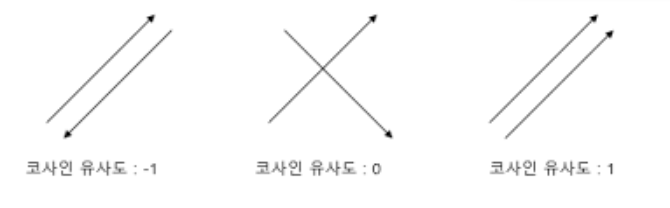

In [76]:
# most_similiar_cosmul: 단순 코사인 유사도를 기반으로 하는 대신,cosmul 방법을 사용(여러 코사인 유사도를 곱샘으로 결함)
# 두백터 사이의 유사성을 계산하는 함수(단어 벡터의 조합을 더 강력하게 처리하는 방식)

# postive 리스트: 'father'+'woman' 단어 백터 더하기
# negative 리스트:'man'벡터 뺴기

# 'father'+'woman'-'man'='mother'

model.most_similar_cosmul(positive=['father','woman'],negative=['man'])

[('mother', 1.025557279586792),
 ('daughter', 0.991381824016571),
 ('husband', 0.9660825729370117),
 ('eldest_daughter', 0.9520994424819946),
 ('sister', 0.9376709461212158),
 ('niece', 0.936501145362854),
 ('aunt', 0.9253349304199219),
 ('son', 0.9216511249542236),
 ('daughters', 0.9201593995094299),
 ('grandmother', 0.9164769649505615)]

In [80]:
# 소주, 맥시코랑 연관있는 단어, 하지만 한국과는 먼단어
print(model.most_similar_cosmul(positive=['soju','mexico'],negative=['Korea']))
print(model.most_similar_cosmul(positive=['soju','russia'],negative=['Korea']))

[('tequila', 0.9362093210220337), ('vicodin', 0.9258661270141602), ('agua', 0.9117656350135803), ('caffine', 0.911275327205658), ('mezcal', 0.9088047742843628), ('michelada', 0.8982411026954651), ('barato', 0.8974483609199524), ('perry', 0.889740526676178), ('klonopin', 0.8895558714866638), ('vino_tinto', 0.8841785192489624)]
[('perry', 0.8880278468132019), ('brandy', 0.8802475929260254), ('Puligny_Montrachet', 0.8756536841392517), ('ordinaire', 0.8733968734741211), ('rakiya', 0.8690335750579834), ('kir', 0.8690198063850403), ('cheap_plonk', 0.86789470911026), ('oj', 0.8619465827941895), ('snifter', 0.8617863059043884), ('pastis', 0.8612386584281921)]


In [ ]:
# 자연어 뿐만 아니라 이미지, 음성 등 다양한 분야에서 임베딩을 활용
# 사전 학습된 임베딩 모델을 가저다 쓸 수 있지만
# 우리 모델과 결합된 상태로 직접 학습시킬 수도 있음!

In [81]:
from tensorflow.keras.layers import Embedding # 임베딩 레이어

# 텐서플어우의 Embedding 레이어는 엔드 투 엔드 방식으로 모델 내부에서 학습이 이루어짐
# 모델 훈련 과정에서 단어를 입베딩 공간에 매핑하는 역할을 하고
# 이 임베딩 레이어는 모델 훈련 중에 가중치를 업데이트하면서 학습


In [ ]:
x_train_vec.shape,x_test_vec.shape
#Embedding 레이어는 단어 인덱스가 담긴 정수형 2D 텐서를 입력으로 받는 구조
# 현재 x_train_vec는 이미 3D형태로 되어있어 추가적인 차원이 존재

((149995, 10, 1), (49997, 10, 1))

In [ ]:
# 차원 축소
x_test_vec_sq=np.squeeze(x_test_vec,axis=-1)
x_train_vec_sq=np.squeeze(x_train_vec,axis=-1)



In [85]:
x_test_vec_sq.shape,x_train_vec_sq.shape

((49997, 10), (149995, 10))

In [86]:
# 단어사전 수 확인
vectorizer.vocabulary_size()

5000

In [91]:
# 모델 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
model_with_embedding=Sequential()
model_with_embedding.add(Embedding(5000,50)) #사용하는 단어사전의 수, 한 단어를 이식할 숫자벡터의 크기
#5000: 사용할 수 있는 단어의 최대수
#50: 각 단어를 50차원의 벡토로 변환(즉,하나의 단어는 50개의 실수로 이루어진 벡터로 표현)
# cat:이라는 단어는 50크기인 벡터임
model_with_embedding.add(LSTM(128))
model_with_embedding.add(Dense(units=1,activation='sigmoid'))

#모델학습방법

model_with_embedding.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his_embedding=model_with_embedding.fit(x_train_vec_sq,y_train,validation_split=0.2,batch_size=128,epochs=30)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7870 - loss: 0.4405 - val_accuracy: 0.8102 - val_loss: 0.4089
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8174 - loss: 0.3931 - val_accuracy: 0.8112 - val_loss: 0.4064
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8298 - loss: 0.3709 - val_accuracy: 0.8186 - val_loss: 0.3922
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8395 - loss: 0.3505 - val_accuracy: 0.8201 - val_loss: 0.3980
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8483 - loss: 0.3324 - val_accuracy: 0.8168 - val_loss: 0.3972
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8581 - loss: 0.3140 - val_accuracy: 0.8144 - val_loss: 0.4157
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8671 - loss: 0.2958 - val_accuracy: 0.8131 - val_loss: 0.4281
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8758 - loss: 0.2775 - 

In [92]:
import time
for i in range(120):
    print(f'{i}분경과')
    time.sleep(60) # 60초 대기

0분경과
1분경과
2분경과
3분경과
4분경과
5분경과
6분경과
7분경과
8분경과
9분경과


KeyboardInterrupt: 

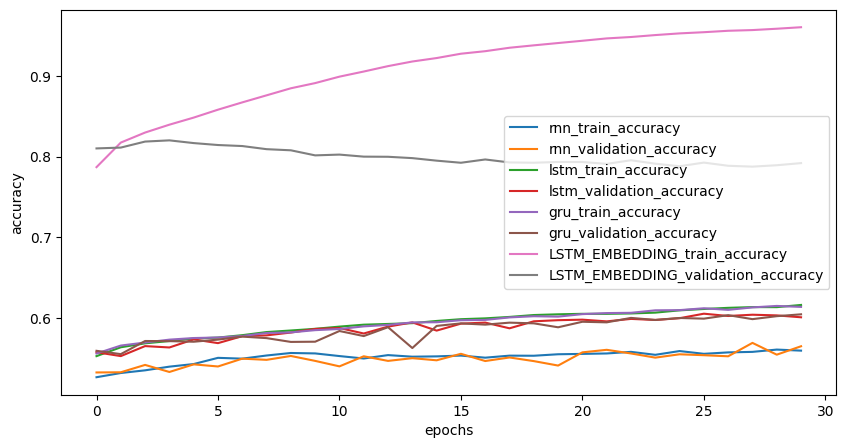

In [ ]:
# 결과 시각화

plt.figure(figsize=(10,5))

#바닐라 rnn
plt.plot(h.history['accuracy'],label='rnn_train_accuracy')
plt.plot(h.history['val_accuracy'],label='rnn_validation_accuracy')

# lstm
plt.plot(h_lstm.history['accuracy'],label='lstm_train_accuracy')
plt.plot(h_lstm.history['val_accuracy'],label='lstm_validation_accuracy')

# gru
plt.plot(h_gru.history['accuracy'],label='gru_train_accuracy')
plt.plot(h_gru.history['val_accuracy'],label='gru_validation_accuracy')
#embedding
plt.plot(his_embedding.history['accuracy'],label='LSTM_EMBEDDING_train_accuracy')
plt.plot(his_embedding.history['val_accuracy'],label='LSTM_EMBEDDING_validation_accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()

plt.show()
# 우선 성능능 월등히 상승됨 하지만 과대적합이 발생하였음
# 과대적합 발생
# 학습율 조정,dropout 적용, 배치정규화,규제 등으로 과대적합 제어 가능

In [ ]:
### 임베딩 레이어
# -임베딩레이어에 들어있는 숫자 묶음을 임베딩벡터라고 부름
# - 잘만들어진 임베딩벡터는 전이학습에 활용할 수 있음
model_with_embedding.summary()

# 임베딩 레이어 이름 확인
#

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 10, 50)         │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025,333 (3.91 MB)

 Trainable params: 341,777 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 683,556 (2.61 MB)

In [99]:
# 모델에서 특정 레이어(임베딩 레이어) 가저오기
Embedding_layer=model_with_embedding.get_layer('embedding_1')

In [105]:
# 임베딩 레이어는 단어를 임베딩 벡터로 변환하는 역할을 한다.
# 이떼, 학습된 임베딩 행렬(가중치)을 사용함
# 임베딩 행렬의 각 행은 단어에 대응, 해당 단어의 임베딩 벡터를 포함
#임베딩 레이어에서, 학습된 가중치(임베딩 행렬)를 추출

embedding_matrix=Embedding_layer.get_weights()[0]
#(단어사전크기,임베딩차원)
# get_weights(): 가중치를 리스트로 변환해서 가저옴(가중치는 보통 여러개임)
#임베딩 레이어는 가중치가 하나(임베딩 행렬 하나)즉, [0번쨰]만 가지고 있음
embedding_matrix.shape


(5000, 50)

### RNN
- 특징
 - 이전 데이터가 다음 데이터에 영향을 준다.
 - SEQUENCE 데이터를 시간 순서대로 순차처리
- 한계
 - 병렬처리가 불가 -> 학습속도 느림
 - 각 시퀀스에서 정보가 점차 희석됨
 - 고정연결(인접 시점 간 정보 전달에 의존)

- 보완
 - LSTM/GRU

## 대체
### Transformer

- RNN과 대비되는 특징
 - 시퀀스 데이터여도 병렬처리 가능
 - 모든 토큰이 모든 토큰을 직접 참조 -> 정보가 희석 되지 않음
 - 동적 연결



### RNN 계열 층 여러개 쌓기
- RNN계열 레이어는 기본적으로 다수 입력 단일 출력 구조
- RNN계열 레이어를 여러개 쌓으려면 이전 레이어를 다수입력
다수 출력 구조로 변경

In [126]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_accuracy',patience=10,verbose=1)
# 모델 설계 
model_with_embedding2=Sequential()
model_with_embedding2.add(Embedding(5000,50))
model_with_embedding2.add(GRU(128,return_sequences=True))
model_with_embedding2.add(GRU(128,return_sequences=False))


model_with_embedding2.add(Dense(1,activation='sigmoid'))
#모델 학습방법 설계
model_with_embedding2.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
#모델 학습
h=model_with_embedding2.fit(x_train_vec_sq,y_train,validation_split=0.2,batch_size=128,epochs=30)



Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.7854 - loss: 0.4395 - val_accuracy: 0.8126 - val_loss: 0.4033
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8250 - loss: 0.3790 - val_accuracy: 0.8169 - val_loss: 0.3927
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8361 - loss: 0.3549 - val_accuracy: 0.8172 - val_loss: 0.3950
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8458 - loss: 0.3364 - val_accuracy: 0.8199 - val_loss: 0.3950
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.8551 - loss: 0.3186 - val_accuracy: 0.8173 - val_loss: 0.4034
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8650 - loss: 0.3001 - val_accuracy: 0.8167 - val_loss: 0.4233
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8746 - loss: 0.2816 - val_accuracy: 0.8136 - val_loss: 0.4416
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8833 - loss: 0.2623 - 

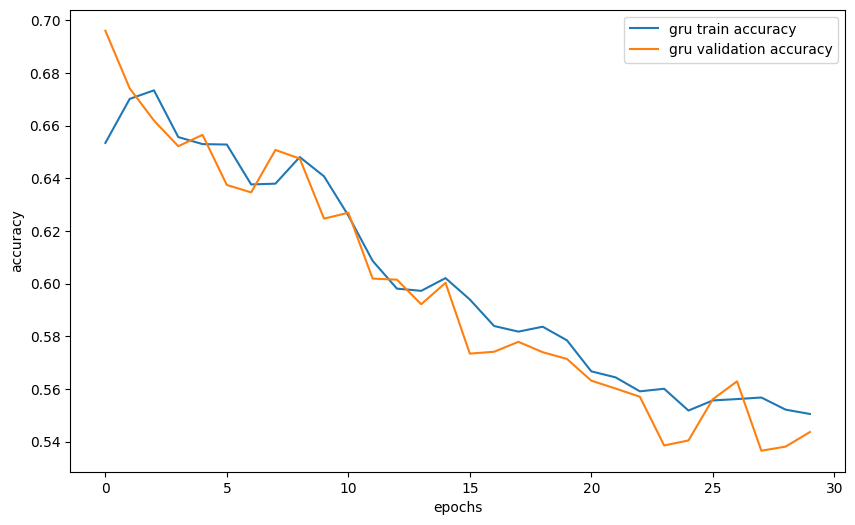

In [116]:
plt.figure(figsize=(10,6))
plt.plot(h.history['accuracy'],label='gru train accuracy')
plt.plot(h.history['val_accuracy'],label='gru validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [117]:
y_pred=model_with_embedding2.predict(x_test_vec_sq)
y_pred

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


array([[0.70652616],
       [0.3374514 ],
       [0.4774025 ],
       ...,
       [0.50359285],
       [0.64715505],
       [0.3496762 ]], shape=(49997, 1), dtype=float32)

In [118]:
#예측된결과를 1차원으로 변형

y_pred= y_pred.reshape(-1)
y_pred.shape

(49997,)

In [119]:
y_pred=np.where(y_pred>0.5,1,0)
y_pred

array([1, 0, 0, ..., 1, 1, 0], shape=(49997,))

In [121]:
test_df=pd.read_csv('/home/hyuksu/projects/ml/bootcampdeeplearning/data/ratings_test (1).csv')
test_df['document'].dropna().shape,x_test_clean.shape,y_test.shape,y_pred.shape

((49997,), (49997,), (49997,), (49997,))

In [122]:
pd.DataFrame({'origin_text':test_df['document'].dropna(),'clean_text':x_test_clean,'y_true':y_test,'y_pred':y_pred})

,origin_text,clean_text,y_true,y_pred
0,굳 ㅋ,굳다,1,1
1,GDNTOPCLASSINTHECLUB,,0,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,뭐 평점 나쁘다 않다 점 짜다 리 더욱 아니다,0,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,지루하다 않다 완전 막장 임 돈 주다 보기,0,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,아니다 별 다섯 개 주다 왜 나오다 심기 불편하다 하다,0,1
...,...,...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,평점 기다 하다 킹왕짱 쌈뽕 영화 만나다 강렬하다 쾌함,1,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,의지 박약 하다 탈영 일단 주인공 김대희 닮다 이등병 찌다 따다,0,1
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,그림 좋다 완성 도도 높다 보다 내내 불안하다 만들다,0,1
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,절대 보다 서다 안 되다 영화 재미 없다 기분 잡 하다 세트 해먹,0,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

| **평가지표**               | **설명**                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------|
| **Precision (정밀도)**      | 예측한 1의 값 중에서 실제로 1인 비율 (얼마나 정밀하게 잘 맞추었는가?)                        |
| **Recall (재현율)**         | 실제 1 중에서 모델이 1로 올바르게 예측한 비율 (양성을 얼마나 잘 걸러내었는가?)               |
| **F1-score**                | 정밀도와 재현율의 조화 평균 (정밀도와 재현율이 조화를 이루는 지표)                            |
| **Support**                 | 각 클래스의 실제 데이터 개수                                                                 |
| **Accuracy (정확도)**       | 전체 예측에서 맞춘 비율                                                                       |
| **Macro avg**               | 각 클래스의 정밀도, 재현율, F1-score의 단순 평균                                              |
| **Weighted avg**            | 각 클래스의 Support에 비례하여 가중치를 적용한 평균 

### 결론
- 테스트 데이터에 대해 79%의 정확도를 달성함.
- 정밀도와 재현율 모두 70%~80&
- 전반적으로 0과 1클래스 모두에서 균형잡힌 성능을 보임